<a href="https://colab.research.google.com/github/filipecarbonera/primeiro_web_scraping/blob/main/meu_primeiro_web_scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto:** Meu primeiro Web Scraping

Um dos meus grandes sonhos é conhecer a Europa e, por minha família ser de origem italiana, nada mais justo que a Itália ser um dos primeiros países que eu queira visitar.

Como de costume, se eu for para um local desconhecido, quero me hospedar em um hostel para aumentar a chance de conhecer pessoas e fazer novas amizades.

Por isso, nesse projeto vou buscar algumas informações em um site referência em hostels pelo mundo.

Algumas delas vão me servir para auxiliar na decisão de que locar ficar quando fizer minha viagem, mas vou aproveitar o projeto para buscar outras informações e fazer um projeto de análise de dados mais abrangente.

## Web Scraping

Site: https://www.hostelworld.com/hostels/Rome

Informações que irei buscar:
- Nome do hostel
- Link para a página do hostel
- Distância do hostel até o centro da cidade
- Nota média de avaliação
- Preço médio por noite, em USD
- Número de avaliações feitas para aquele local

In [1]:
#Importando as bibliotecas necessárias.
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [2]:
# Criando as listas necessárias para armazenar as informações que serão buscadas.
hostel_names= []
hostel_links= []
hostel_distance= []
hostel_ratings= []
hostel_reviews= []
hostel_prices= []

# Iterando as páginas para buscar a informação completa de todos os hostels cadastrados da cidade.
for pagina in np.arange(1,6):
  url = 'https://www.hostelworld.com/hostels/Rome?page=' + str(pagina) # Buscando as páginas de acordo com o padrão de url do site.
  dados_url = get(url)
  soup = BeautifulSoup(dados_url.text, 'html.parser')
  hostel_containers= soup.findAll(class_= 'fabresult rounded clearfix hwta-property') # Buscando os containers de informações.

# Iterando os contêineres o atribuindo a cada uma das listas o valor correspondente.
  for i in range(len(hostel_containers)):
    hostel_names.append(hostel_containers[i].h2.a.text)
    hostel_links.append(hostel_containers[i].h2.a.get('href'))
    hostel_distance.append(hostel_containers[i].find(class_= "addressline").text[12:18].replace('k','').replace('m','').replace('fr','').strip())
    hostel_ratings.append(hostel_containers[i].find(class_ = "hwta-rating-score").text.strip())
    hostel_reviews.append(hostel_containers[i].find(class_="hwta-rating-counter").text.strip())
    hostel_prices.append(hostel_containers[i].find(class_= "minprice clearfix").text[4:10].replace('P','').strip())


## Feature engineering:

In [3]:
# Transformando o conjunto de listas em um dataframe único do Pandas.
df_rome = pd.DataFrame(
    {
     'nome': hostel_names,
     'distancia_centro': hostel_distance,
     'nota': hostel_ratings,
     'aval_num': hostel_reviews,
     'preco': hostel_prices,
     'link': hostel_links,
    }
)

# Visualizando o dataframe criado após o web-scraping.
df_rome

,nome,distancia_centro,nota,aval_num,preco,link
0,YellowSquare Rome,1.8,8.9,20269,14.49,https://www.hostelworld.com/hosteldetails.php/...
1,The RomeHello Hostel,1,9.6,1978,19.05,https://www.hostelworld.com/hosteldetails.php/...
2,Free Hostels Roma,2.3,9.3,499,18.11,https://www.hostelworld.com/hosteldetails.php/...
3,Alessandro Palace & Bar,1.8,8.4,12631,15.62,https://www.hostelworld.com/hosteldetails.php/...
4,Freedom Traveller,1.5,8.0,6606,13.58,https://www.hostelworld.com/hosteldetails.php/...
...,...,...,...,...,...,...
145,C'est La Vie Suites,3,0.0,0,36.23,https://www.hostelworld.com/hosteldetails.php/...
146,A Casa Boschi b&b,3,0.0,0,33.96,https://www.hostelworld.com/hosteldetails.php/...
147,Little rhome suites,1.4,0.0,1,67.92,https://www.hostelworld.com/hosteldetails.php/...
148,CK rooms,2,0.0,63,25.47,https://www.hostelworld.com/hosteldetails.php/...


In [4]:
df_rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   nome              150 non-null    object
 1   distancia_centro  150 non-null    object
 2   nota              150 non-null    object
 3   aval_num          150 non-null    object
 4   preco             150 non-null    object
 5   link              150 non-null    object
dtypes: object(6)
memory usage: 7.2+ KB


In [5]:
# Transformando o tipo de dados de algumas colunas para melhor trabalhar com eles futuramente.
df_rome['distancia_centro'] = df_rome['distancia_centro'].astype(float)
df_rome['nota'] = df_rome['nota'].astype(float)
df_rome['aval_num'] = df_rome['aval_num'].astype(int)
df_rome['preco'] = df_rome['preco'].astype(float)

In [6]:
df_rome.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nome              150 non-null    object 
 1   distancia_centro  150 non-null    float64
 2   nota              150 non-null    float64
 3   aval_num          150 non-null    int64  
 4   preco             150 non-null    float64
 5   link              150 non-null    object 
dtypes: float64(3), int64(1), object(2)
memory usage: 7.2+ KB


In [7]:
df_rome.head()

,nome,distancia_centro,nota,aval_num,preco,link
0,YellowSquare Rome,1.8,8.9,20269,14.49,https://www.hostelworld.com/hosteldetails.php/...
1,The RomeHello Hostel,1.0,9.6,1978,19.05,https://www.hostelworld.com/hosteldetails.php/...
2,Free Hostels Roma,2.3,9.3,499,18.11,https://www.hostelworld.com/hosteldetails.php/...
3,Alessandro Palace & Bar,1.8,8.4,12631,15.62,https://www.hostelworld.com/hosteldetails.php/...
4,Freedom Traveller,1.5,8.0,6606,13.58,https://www.hostelworld.com/hosteldetails.php/...


## Análise Exporatória:

In [8]:
# Importando as bibliotecas necessárias para a análise.
import matplotlib.pyplot as plt

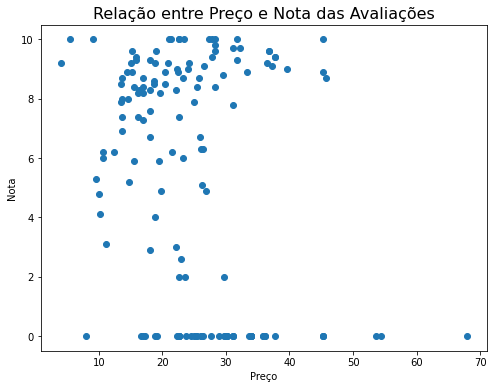

In [9]:
plt.figure(1,figsize=(8,6))
plt.xlabel('Preço')
plt.ylabel('Nota')
plt.title('Relação entre Preço e Nota das Avaliações', fontdict={'fontsize': 16})
plt.scatter(df_rome['preco'], df_rome['nota'])

**Conclusões:**
- A cidade tem notas bastante altas se comparado ao preço pago pela estadia.
- Grande parte dos preços se concentra entre 10 e 40 dólares a diária.
- Muitas acomodações, em diversas faixas de preço, tem nota zero, mas é bem provável que sejam avaliações não realizadas.

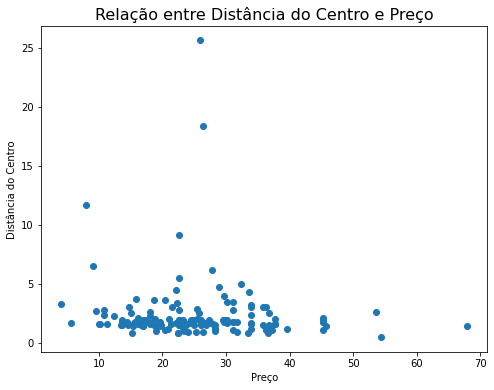

In [10]:
plt.figure(1,figsize=(8,6))
plt.ylabel('Distância do Centro')
plt.xlabel('Preço')
plt.title('Relação entre Distância do Centro e Preço', fontdict={'fontsize': 16})
plt.scatter( df_rome['preco'], df_rome['distancia_centro'])

**Conclusões:**
- Grande parte das acomodações está a menos de 5km do centro de Roma.

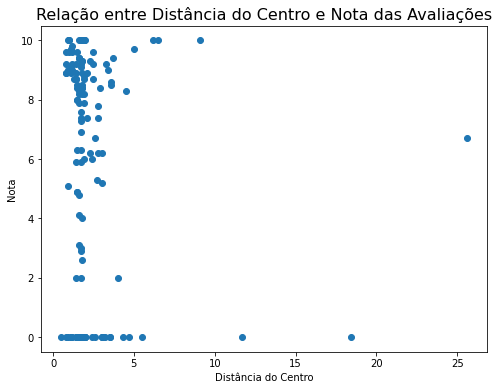

In [11]:
plt.figure(1,figsize=(8,6))
plt.xlabel('Distância do Centro')
plt.ylabel('Nota')
plt.title('Relação entre Distância do Centro e Nota das Avaliações', fontdict={'fontsize': 16})
plt.scatter(df_rome['distancia_centro'], df_rome['nota'])

**Conclusões:**
- Distância do centro não parece ser um fator determinante para uma avaliação boa ou ruim.
- A maioria dos hostels tem notas elevadas e esses mesmos hostels estão há pouca distância do centro.

## Apoio a Decisão:

Nesta parte final vou criar alguns parâmetros para a tomada de decisão e espero que tais parâmetros auxiliem na tomada de decisão de qual hospedagem contratar para ficar em Roma na minha viagem.

In [12]:
df_rome.head()

,nome,distancia_centro,nota,aval_num,preco,link
0,YellowSquare Rome,1.8,8.9,20269,14.49,https://www.hostelworld.com/hosteldetails.php/...
1,The RomeHello Hostel,1.0,9.6,1978,19.05,https://www.hostelworld.com/hosteldetails.php/...
2,Free Hostels Roma,2.3,9.3,499,18.11,https://www.hostelworld.com/hosteldetails.php/...
3,Alessandro Palace & Bar,1.8,8.4,12631,15.62,https://www.hostelworld.com/hosteldetails.php/...
4,Freedom Traveller,1.5,8.0,6606,13.58,https://www.hostelworld.com/hosteldetails.php/...


In [13]:
# Crio então uma nova coluna resultante da razão entre nota e preço.
df_rome['razao_nota_preco'] = df_rome['nota'] / df_rome['preco']

# Ordeno o dataframe de acordo com essa nova coluna.
df_rome = df_rome.sort_values('razao_nota_preco', ascending=False)

# Desta forma consigo identificar as melhores relações entre nota alta e preço baixo, aspectos que mais influenciam minhas decisões.
df_rome

,nome,distancia_centro,nota,aval_num,preco,link,razao_nota_preco
70,Marco e Laura B&B,3.3,9.2,16,4.08,https://www.hostelworld.com/hosteldetails.php/...,2.254902
41,Ostello Bello Roma Colosseo,1.7,10.0,3,5.55,https://www.hostelworld.com/hosteldetails.php/...,1.801802
64,Roma Camping in Town,6.5,10.0,4863,9.06,https://www.hostelworld.com/hosteldetails.php/...,1.103753
50,Des Artistes Budget Rooms,1.9,8.7,2588,13.58,https://www.hostelworld.com/hosteldetails.php/...,0.640648
15,Legends,1.5,8.5,4907,13.47,https://www.hostelworld.com/hosteldetails.php/...,0.631032
...,...,...,...,...,...,...,...
117,Seven Guest Rooms,0.9,0.0,0,25.29,https://www.hostelworld.com/hosteldetails.php/...,0.000000
118,Hotel delle Muse,3.5,0.0,6,31.15,https://www.hostelworld.com/hosteldetails.php/...,0.000000
120,B&B Bed in Roma,1.8,0.0,12,26.04,https://www.hostelworld.com/hosteldetails.php/...,0.000000
121,Abbraccia Morfeo B&B,5.5,0.0,18,22.58,https://www.hostelworld.com/hosteldetails.php/...,0.000000


In [14]:
# Confirmo o tipo de data presente na nova coluna. Sendo float consigo filtrar as linhas/hostels de forma condicional à razão criada.
df_rome.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 70 to 149
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nome              150 non-null    object 
 1   distancia_centro  150 non-null    float64
 2   nota              150 non-null    float64
 3   aval_num          150 non-null    int64  
 4   preco             150 non-null    float64
 5   link              150 non-null    object 
 6   razao_nota_preco  150 non-null    float64
dtypes: float64(4), int64(1), object(2)
memory usage: 9.4+ KB


In [15]:
# Filtro, então, o dataframe para apresentar apenas as 3 melhores opções dentro dos parâmetros estabelecidos.
df_rome = df_rome.drop(df_rome[df_rome.razao_nota_preco < 0.8].index)
df_rome

,nome,distancia_centro,nota,aval_num,preco,link,razao_nota_preco
70,Marco e Laura B&B,3.3,9.2,16,4.08,https://www.hostelworld.com/hosteldetails.php/...,2.254902
41,Ostello Bello Roma Colosseo,1.7,10.0,3,5.55,https://www.hostelworld.com/hosteldetails.php/...,1.801802
64,Roma Camping in Town,6.5,10.0,4863,9.06,https://www.hostelworld.com/hosteldetails.php/...,1.103753


- Importante ressaltar que eu poderia ter apenas escolhido o hostel que apresentasse a melhor razão nota/preço, mas prefiro deixar a decisão final ser tomada por um ser humano (eu) com opções pois acredito que um pouco de intuição faz parte da experiência de conhecer novos lugares.

In [16]:
# Abaixo, o link (clicável) dos hostels selecionados para minha avaliação futura.

for i in df_rome['link']:
 print(i)

https://www.hostelworld.com/hosteldetails.php/Marco-e-Laura-B-and-B/Rome/71593
https://www.hostelworld.com/hosteldetails.php/Ostello-Bello-Roma-Colosseo/Rome/311605
https://www.hostelworld.com/hosteldetails.php/Roma-Camping-in-Town/Rome/6268
